<h1>Using GUI with Python</h1>

In [ ]:
from ipywidgets import interact,interactive,fixed
import ipywidgets as widgets

In [ ]:
def func(x):
    return x

In [ ]:
interact(func,x='Hello')

In [ ]:
@interact(x=True,y=fixed(1.0))
def g(x,y):
    return (x,y)

In [ ]:
interact(func,x=widgets.IntSlider(10,-100,1000,5))

In [ ]:
interact(func,x=(-100,100,1))

In [ ]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.0):
    return x

In [ ]:
interact(func,x=['hello','option2','option3'])

In [ ]:
interact(func,x={'one':10,'two':20})

In [ ]:
from IPython.display import display
def f(a,b):
    display(a+b)
    return a+b

In [ ]:

w = interactive(f,a=10,b=20)

In [ ]:
type(w)

In [ ]:
w.children

In [ ]:
display(w)

<h2>Widget Basics</h2>

In [ ]:
e = widgets.IntSlider()

In [ ]:
display(e)

In [ ]:
display(e)

In [ ]:
e.close()

In [ ]:
e = widgets.IntSlider()
display(e)

In [ ]:
e.value

In [ ]:
e.keys

In [ ]:
e.max = 100

In [ ]:
e.description = 'This is a slider for cool kids'

In [ ]:
a = widgets.FloatText(value='10')
b = widgets.FloatSlider()
display(a,b)
my_link = widgets.jslink((b,'value'),(a,'value'))

<h2>Widget List</h2>

In [ ]:
for item in widgets.Widget.widget_types.items():
    print(item[0][-1])

<h2>Widget Styling</h2>

In [ ]:
w = widgets.IntSlider()

In [ ]:
display(w)

In [ ]:
w.layout.margin = 'auto'
w.layout.height = '75px'

In [ ]:
x = widgets.IntSlider(value=15,descrtiption='New Slider')
display(x)

In [ ]:
x.layout = w.layout

In [ ]:
b1 = widgets.Button(description='Ordinary Button')

In [ ]:
b1.style.button_color = 'lightgreen'
b1

In [ ]:
b1.style.keys

In [ ]:
b2 = widgets.Button()

In [ ]:
b2.style = b1.style
b2

In [124]:
s1 = widgets.IntSlider(descripion='My Handle')
s1.style.handle_color = 'lightgreen'

In [125]:
s1

IntSlider(value=0, style=SliderStyle(handle_color='lightgreen'))

In [126]:
s1.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width',
 'handle_color']

<h2>A Custom Widget</h2>

In [127]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [129]:
from ipywidgets import interact,interactive
from IPython.display import clear_output,display,HTML

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [144]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta =8./3, rho=28.0):

    fig = plt.figure();
    ax = fig.add_axes([0,0,1,1], projection='3d');
    ax.axis('off')

    #prepare the axes limits
    ax.set_xlim((-25,25))
    ax.set_ylim((-35,35))
    ax.set_zlim((5,55))

    def lorenz_deriv(x_y_z, t0, sigma=sigma,beta=beta,rho=rho):
        x,y,z = x_y_z
        return [sigma * ( y- x), x * (rho - z) - y, x * y - beta * z]

    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    t = np.linspace(0, max_time, int(50*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                    for x0i in x0])

    colors = plt.cm.jet(np.linspace(0,1,N));

    for i in range(N):
        x,y,z = x_t[i,:,:].T
        lines = ax.plot(x,y,z, '-', c=colors[i])
        _ = plt.setp(lines,linewidth=2);

    ax.view_init(30, angle)
    _ = plt.show();

    return t, x_t



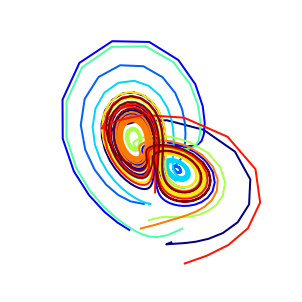

In [145]:
t, x_t = solve_lorenz(angle=0, N=10)

In [150]:
w = interactive(solve_lorenz, max_time=(0,20),angle=(0,360.),N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

In [151]:
t, x_t = w.result
w.kwargs

{'N': 10,
 'angle': 105.7,
 'max_time': 4,
 'sigma': 10.0,
 'beta': 2.6666666666666665,
 'rho': 28.0}

In [153]:
xyz_avg = x_t.mean(axis=1)
xyz_avg.shape

(10, 3)

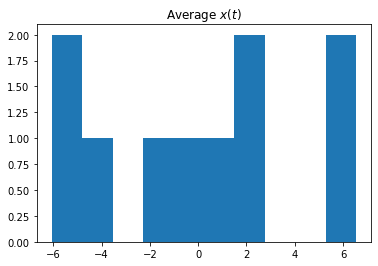

In [154]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');